In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize



class EinstienFormula():
    
    def __init__(self , et , name):
        
        self.name = name #name of the element
        self.w = 1 #angular frequency of harmonic oscillator rad/s 
        self.kb = 1.3e-23 #boltzmann constant J/k
        self.ET = et #einstien temperature kelivin
        self.t_s = np.arange(1,1320,0.001) #temperature series in kelvin - 1-300 K with 0.01K increment 
        self.h = 1.054e-34 #plancks constant h-bar
        self.SpecificHeat = [] #specific heat series in J/kg
        self.N = 6.023e23
        
    def CalculateW(self):
        
        self.w = self.ET*self.kb/self.h
        self.f = self.w/2*np.pi
        
    def CalculateSH(self):
        
        self.SpecificHeat = self.kb*((self.ET/self.t_s)**2)*(np.exp(self.ET/self.t_s)/((np.exp(self.ET/self.t_s))-1)**2)
        
    def Plot(self):
        
        self.CalculateW()
        self.CalculateSH()
        #print(self.w)
        #print(self.SpecificHeat)
        plt.figure(figsize=(30,10))
        plt.style.use('ggplot')
        plt.title("specific heat over T for {}".format(self.name))
        plt.plot(self.t_s , self.SpecificHeat)
        plt.xlabel("T")
        plt.ylabel("specific heat in J/kg")
        plt.show()
        

f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in exp
f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in square
f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


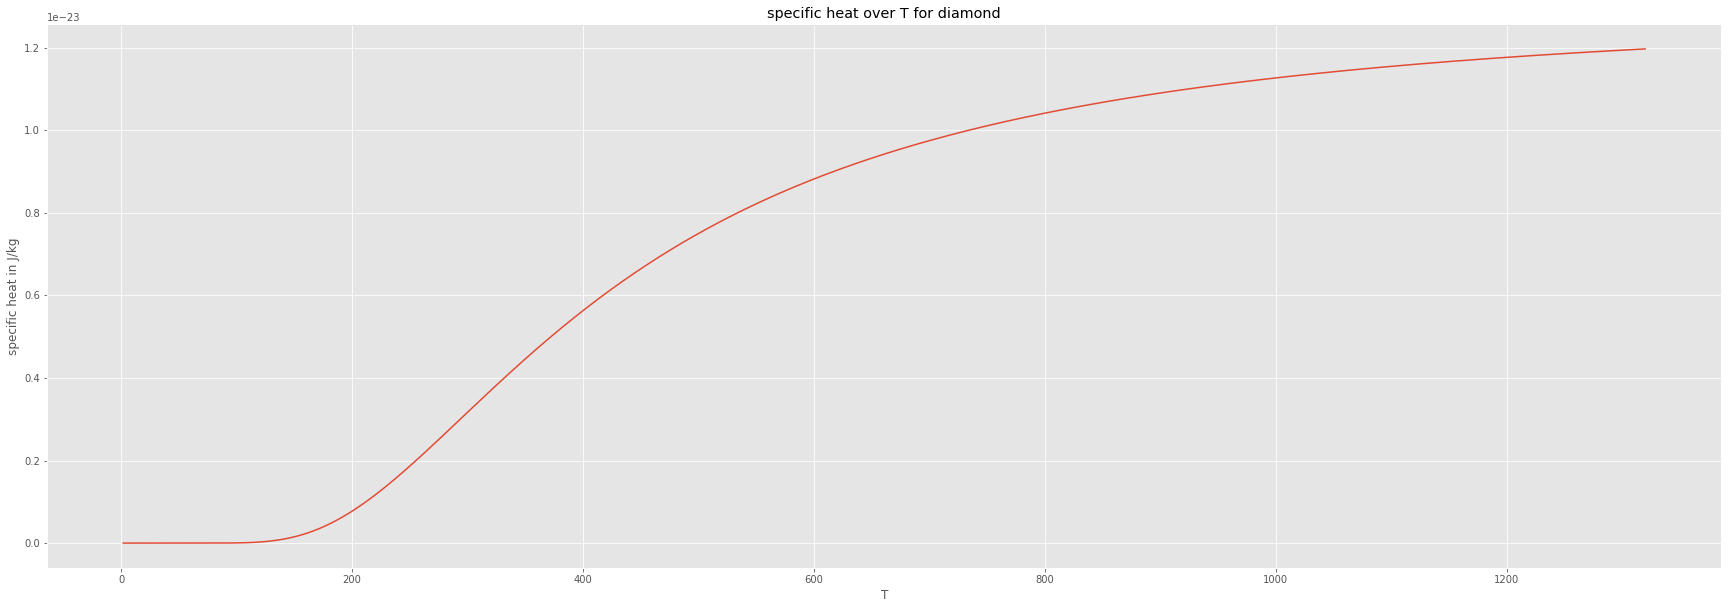

[           nan            nan            nan ... 1.19687523e-23
 1.19687538e-23 1.19687552e-23]


In [32]:
#plotting einstien solid specific heat for diamond 

e = EinstienFormula(1320, "diamond") #einstien temperature for diamond is 1320K
e.Plot()

print(e.SpecificHeat)


In [ ]:
#building a model that will fit the data 
 
import s